# Packages

In [1]:
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2
import statsmodels.api as sms
import matplotlib.pyplot as plt 
from scipy.stats import t, probplot


# Exercise 1

## Generating the data 

In [2]:
#============== data (d) matrix
d = np.array([3.4935,4.2853,5.1374,5.8181,6.8632,8.1841])

#============== G matrix
x = np.array([6.0000,10.1333,14.2667,18.4000,22.5333,26.6667])
G = np.ones((6,2))
G[:,1] = x
G

array([[ 1.    ,  6.    ],
       [ 1.    , 10.1333],
       [ 1.    , 14.2667],
       [ 1.    , 18.4   ],
       [ 1.    , 22.5333],
       [ 1.    , 26.6667]])

In [3]:
#============== Weighted G
sigma = 0.1 
m = 6
n = 2
noise_data = sigma*np.ones((m))
Gw = np.ones((m,n))

for i in range(m):
    Gw[i,:] = G[i,:]/noise_data[i]
Gw

array([[ 10.   ,  60.   ],
       [ 10.   , 101.333],
       [ 10.   , 142.667],
       [ 10.   , 184.   ],
       [ 10.   , 225.333],
       [ 10.   , 266.667]])

In [4]:
#============== Weighted d
dw = d/noise_data
dw

array([34.935, 42.853, 51.374, 58.181, 68.632, 81.841])

## Q1

In [5]:
#============== Least square solution
m_L2 = np.linalg.lstsq(Gw,dw,rcond=None)[0]
print(f'The least square solution for t_0 and s_2 is {m_L2}, respectively.')

The least square solution for t_0 and s_2 is [2.03233708 0.2202814 ], respectively.


In [6]:
#============== Fitted model 
d_fitted = m_L2[0] + m_L2[1]*x
d_fitted

array([3.3540255 , 4.26451463, 5.17502578, 6.0855149 , 6.99600402,
       7.90651517])

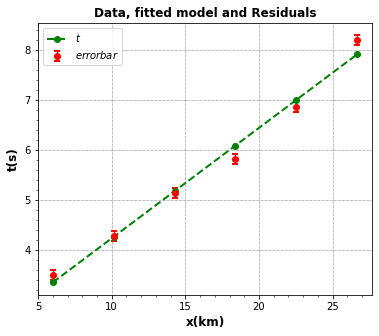

In [7]:
#================= Fitted model and the residuls
plt.figure(figsize = (6,5))
plt.errorbar(x, d, yerr=noise_data, fmt='o', capsize=3, capthick=2,c="r",lw=1)
plt.plot(x,d_fitted,linewidth=2,linestyle='dashed',  marker="o",c="g")
plt.legend(['$t$','$error bar$'])
plt.title('Data, fitted model and Residuals',fontweight='bold',fontsize=12)
plt.xlabel('x(km)',fontweight='bold',fontsize=12)
plt.ylabel('t(s)',fontweight='bold',fontsize=12)
plt.minorticks_on()
plt.grid(linestyle=':', linewidth=0.5, color='k')
plt.show()

## Q2

There is a high negative correlation of -0.9179 between the model parameter, $t_0$ and $s_2$. These means the increase in the parameter values is inversely proportional. One increases as the other decreases. Thus, they cannot increase together. The correlation along the leading diagonal is perfect (i.e. this is expected) because it defines the correlation between a parameter and itself.  

In [8]:
#================= Covariance matrix 
GG = G.T@G
cov_m_L2 = (0.1**2)*np.linalg.inv(GG)
cov_m_L2

#================= Correlation matrix
sd = np.sqrt(np.diag(cov_m_L2)).reshape(2,1)

corr_matrix = np.divide(cov_m_L2,(sd*sd.T))
print(f'The correlation matrix is:\n\n{corr_matrix}')

The correlation matrix is:

[[ 1.         -0.91793986]
 [-0.91793986  1.        ]]


In [9]:
# m_true = np.linalg.solve(G, d)

## Q3

The error ellipsoid decreases from left to right in the ($t_0$, $s_2$) plane. This reflects the negative correlation between the two parameters as already seen in the question above. This also means the errors are not independent. It can also be noticed that the parameter values ($t_0$, $s_2$) are located in the middle of the error ellipsoid. 

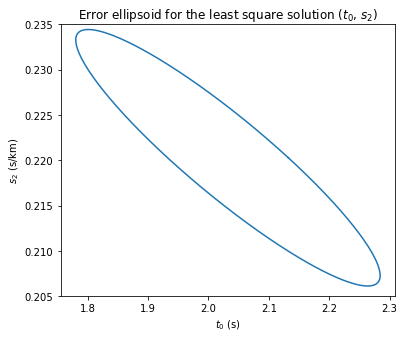

In [10]:
#================= 
def plot_ellipse(DELTA2, C, m):
    n = 10000
    theta = np.linspace(0, 2*np.pi, n)
    xhat = np.column_stack((np.cos(theta), np.sin(theta)))
    Cinv = np.linalg.inv(C)
    r = np.zeros((n, 2))
    for i in range(n):
        r[i,:] = np.sqrt(DELTA2 / (xhat[i,:].dot(Cinv).dot(xhat[i,:].T))) * xhat[i,:]
    plt.figure(figsize=(6,5))
    plt.plot(m[0] + r[:,0], m[1] + r[:,1])
    # plt.axvline(m[0], color='r')
    # plt.axhline(m[1], color='r')
    plt.ylim(0.205, 0.235)
    # plt.axis('tight')
    # plt.axis('equal')
    plt.title(r'Error ellipsoid for the least square solution ($t_0$, $s_2$)')
    plt.xlabel(r'$t_0$ (s)')
    plt.ylabel(r'$s_2$ (s/km)')
    
    
DELTA2 = stats.distributions.chi2.ppf(0.95,2)
DELTA2
m = m_L2
C = cov_m_L2
plot_ellipse(DELTA2, C, m)   

It can be said that the parameters are significant since none of the CIs contain zero (0). This means the true population parameter values are different from zero.

In [11]:
#================= 95% Confindence Inveterval
def CI_95_(m_L2, cov_m_L2):
    standard_error = np.sqrt(np.diag(cov_m_L2))
    lower_ = m_L2 - 1.96*standard_error
    upper_ = m_L2 + 1.96*standard_error
    return lower_, upper_

lower_, upper_ = CI_95_(m_L2, cov_m_L2)
# print("Lower bounds:", lower_)
# print("Upper bounds:", upper_)
print("CI for t_0 is:", [np.round(lower_[0], 4), np.round(upper_[0], 4)])
print("CI for s_2 is:", [np.round(lower_[1], 4), np.round(upper_[1], 4)])

CI for t_0 is: [1.8306, 2.234]
CI for s_2 is: [0.2089, 0.2316]


## Q4

Null hypothesis: $\chi^2_{obs} \sim \chi^2(m-n = 4)$

Decision rule: Reject the null hypothesis if p-value $\approx 0$ or p-value $\approx 1$

In the ouput below, we reject the null hypothesis since the p-value = 0.0008799 is very close to zero (0) and conclude that the $\chi^2_{obs}$ does not follow the theoretical $\chi^2$ distribution with degrees of freedom 4. This suggests the mathematical model is incorrect. Perhaps, some of the physics of the problem are missing from the model.

In [12]:
#================= Computing chi-square observed and p-value
def chi_square(G, m_L2, d, noise_data, dof):
    residuals = G.dot(m_L2) - d
    chi2 = np.linalg.norm(residuals/noise_data)**2 #======= chi-square observed 
    p = 1 - stats.chi2.cdf(chi2, dof) #======= p-value
    print("Chi-square value:", chi2)
    print("Chi-square p-value:", p)
    
m=6; n=2; dof = m-n
chi_square(G, m_L2, d, noise_data, dof)

Chi-square value: 18.75018390401005
Chi-square p-value: 0.0008799160761214786


## Q5

The histogram below represents the $\chi^2$ for the 1000 Monte Carlo simulations. The y-axis of the histogrom is plotted in terms of the densities instead of frequencies. We then overlayed the density plot of the theoretical $\chi^2$ with degrees of freedom 4 over the histogram. As can be seen from the plot, there is a reasonable agreement between the data $\chi^2$ densities from the Monte Carlo simulations and that of the theoretical $\chi^2$ densities with degrees of freedom 4.

2-norm model predicted data:


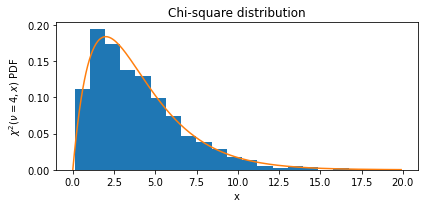

In [13]:
# The baseline data set generated by the 2-norm model
print("2-norm model predicted data:")
db = G.dot(m_L2)

# Number of realizations for Monte Carlo
NR = 1000
M = 6
# Initialize the arrays to store the results
mr2 = np.zeros((2,NR))
chi2r = np.zeros(NR)

for i in range(NR):
    # Generate the data vector for the ith Monte Carlo data set
    dr = db + noise_data * np.random.randn(M)
    # Calculate the weighted data vector
    dw1 = dr / noise_data
    # Find the 2-norm model for the ith Monte Carlo data set, stored as a column of mr2
    mr2[:,i] = np.linalg.lstsq(Gw, dw1,rcond=None)[0]
    # Calculate the chi-square value for the ith Monte Carlo data set
    chi2r[i] = np.linalg.norm((G.dot(mr2[:, i]) - dr) / noise_data) ** 2

# Histogram the chi2 values for the Monte Carlo realizations and compare them with the chi2 PDF
plt.figure(figsize=(6,3))

# Get the population of each of the NBIN bins for scaling the chi2pdf plot
NBIN = 20
plt.hist(chi2r, NBIN, density = True)
#axs.set_xlabel(r"$\chi^2_{obs}$")
# axs[0].set_ylabel("N")
plt.figure
xx = np.arange(0, 20, 0.1)
dof = 4
chitheo = chi2.pdf(xx, dof)
plt.plot(xx, chitheo)
plt.title("Chi-square distribution")
plt.ylabel(r"$\chi^2(\nu=4, x)$ PDF")
plt.xlabel("x")
# axs[1].set_ylim([0, np.max(chitheo)])

plt.tight_layout()
plt.show()

## Q6

The p-value is not consistent with the theoretical modelling; however, the Monte Carlo $\chi^2$ is consistent with the theoretical modelling. The p-value suggests the mathematical model might be incorrect. One possibility could be that the model is affected by some outlier(s).

## Q7

The plot below and the one in Q1 look very similar. In both cases the last data point in the upper right corner seems to be an outlier. It appears far from its predicted value than any other point in the data in both plots.

In [14]:
def irls(A, b, tolr, tolx, p, maxiter):
    """
    Perform Iteratively Reweighted Least Squares (IRLS) 
    algorithm on a matrix A and a vector b.

    Parameters:
    A (numpy.ndarray): Input matrix of shape (m, n).
    b (numpy.ndarray): Input vector of shape (m,).
    tolr (float): Tolerance for the residuals.
    tolx (float): Tolerance for the solution x.
    p (float): Parameter in the weight function.
    maxiter (int): Maximum number of iterations.
    
    Returns:
    numpy.ndarray: Solution vector x of shape (n,).

    Raises:
    Warning: If the maximum number of iterations is exceeded.
    """
    [m, n] = np.shape(A)
    R = np.eye(m)  #======= initialize the weight matrix R
    x = np.linalg.lstsq(A, b, rcond=None)[0]  #======= initialize the solution vector x
    iter = 1
    while (iter <= maxiter):
        iter = iter + 1
        r = np.dot(A, x) - b  #======= compute the residuals
        for i in range(m):
            if (np.abs(r[i]) < tolr).any():  #======= apply the weight function
                r[i] = np.abs(tolr)**(p - 2)
            else:
                r[i] = np.abs(r[i])**(p - 2)
        R = np.diag(r)  #======= update the weight matrix
        H = np.dot(A.T, np.dot(R, A))
        K = np.dot(A.T, np.dot(R, b))
        newx = np.linalg.lstsq(H, K, rcond=None)[0]
        if (np.linalg.norm(newx-x) / (1 + np.linalg.norm(x)) < tolx).any():  #======= check for convergence
            x = newx
            return x
        else:
            x = newx
    raise Warning("irls maximum iterations exceeded.")

m_L1 = irls(Gw, dw, 1.0e-5, 1.0e-5, 1, 500)
m_L1

array([2.17863596, 0.20789516])

In [15]:
d_m_L1 = m_L1[0] + m_L1[1]*x

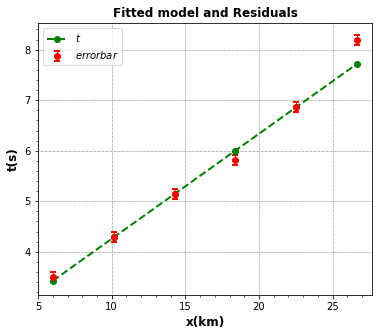

In [16]:
#================= Fitted model and the residuls
plt.figure(figsize = (6,5))
plt.errorbar(x, d, yerr=noise_data, fmt='o', capsize=3, capthick=2,c="r",lw=1)
plt.plot(x, d_m_L1 ,linewidth=2,linestyle='dashed',  marker="o",c="g")
plt.legend(['$t$','$error bar$'])
plt.title('Fitted model and Residuals',fontweight='bold',fontsize=12)
plt.xlabel('x(km)',fontweight='bold',fontsize=12)
plt.ylabel('t(s)',fontweight='bold',fontsize=12)
plt.minorticks_on()
plt.grid(linestyle=':', linewidth=0.5, color='k')
plt.show()

## Q8

In [17]:
import numpy as np
mr1 = np.zeros((2,NR))
for i in range(NR):
    # data vector for the ith Monte Carlo data set
    dr = db + noise_data * np.random.randn(M)
    # weighted data vector
    dw_ = dr / noise_data
    # 2-norm model for the ith Monte Carlo data set, stored as a column of mr
    mr1[:, i] = irls(Gw, dw_, 1.0e-5, 1.0e-5, 1, 500)
mr1.shape

(2, 1000)

In [18]:
NR = 1000
# Estimate L1 confidence intervals
# Mean model
mrmean1 = np.mean(mr1, axis=1)

# Find a range where 95% of the Monte Carlo models are found 
# relative to the mean
m1sort = np.sort(np.abs(mr1[0,:] - mrmean1[0]))
m2sort = np.sort(np.abs(mr1[1,:] - mrmean1[1]))
m11conf = m1sort[int(0.95 * NR)]
m12conf = m2sort[int(0.95 * NR)]

print("m1 Monte Carlo modeling 95% confidence width (indiv. parameters): ({}, {})".format(m11conf, m12conf))

# m11range = [m_L1[0] - m11conf, m_L1[0], m_L1[0] + m11conf]
# m12range = [m_L1[1] - m12conf, m_L1[1], m_L1[1] + m12conf]

m11range = [m_L1[0] - m11conf, m_L1[0] + m11conf]
m12range = [m_L1[1] - m12conf, m_L1[1] + m12conf]


m1 Monte Carlo modeling 95% confidence width (indiv. parameters): (0.26207609937786813, 0.014495005791098248)


In [19]:
print("Monte Carlo CI for t_0:\n", m11range)

Monte Carlo CI for t_0:
 [1.9165598627265386, 2.440712061482275]


In [20]:
print("Monte Carlo CI for s_2:\n", m12range)

Monte Carlo CI for s_2:
 [0.19340015549918882, 0.22239016708138531]


## Q9
From the 1-norm misfit values below, the last data point seem to be an outlier since the deviation between the actual and predicted value is large. This is also evident in the plot of the predicted vs actual values above. 

In [21]:
residual_L1 = abs((d-G@m_L1))
print("1-norm misfit:\n", residual_L1)

1-norm misfit:
 [6.74930702e-02 7.27240490e-12 7.21385968e-03 1.85806930e-01
 6.83275658e-12 4.61586140e-01]


In [22]:
residual_L2 = d - G@m_L2
residual_L2

array([ 0.1394745 ,  0.02078537, -0.03762578, -0.2674149 , -0.13280402,
        0.27758483])

# Exercise 2

## Q1

In [23]:
N=10000
a =1; b=1; sigma=1 
G_ = np.array([[1,1],[1,2],[1,3],[1,4],[1,5]])
m_ = np.array([1,1])
x = np.linspace(1,5,5)

In [24]:
d_True = G_@m_
d_True

array([2, 3, 4, 5, 6])

In [25]:
m_ = 5; n_=2
mL1 = np.zeros((2,N))
residuals_L2 = np.zeros((5,N))
chisqure_obs = np.zeros(N)
sigma = 1
std = np.zeros(N)
C_ = np.zeros(((2,2,N)))
a_tilda = np.zeros(N)
b_tilda = np.zeros(N)

for i in range(N):
    d_ = a + b*x +sigma*np.random.randn(5)
    mL1[:,i] = np.linalg.lstsq(G_, d_, rcond=None)[0]
    residuals_L2[:,i] = G_@mL1[:,i] - d_
    chisqure_obs[i] = np.linalg.norm((residuals_L2[:,i])/1)**2
    std[i] = np.sum(residuals_L2[:,i]**2)/(m_-n_)
    #print(C_.shape)

for j in range(N):
    C_ = std[j]*(np.linalg.inv(G_.T@G_))
    a_tilda[j] = (mL1[:,j][0] - np.mean(mL1[0]))/(np.sqrt(C_[0][0]))
    b_tilda[j] = (mL1[:,j][1] - np.mean(mL1[1]))/(np.sqrt(C_[1][1]))

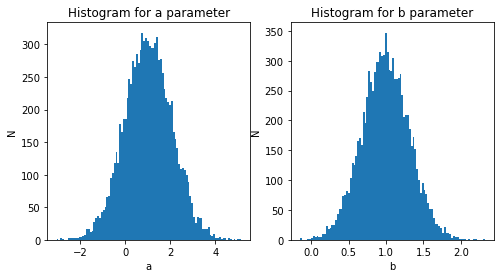

In [26]:
plt.figure(figsize=(8,4))

#=========== Histogram for a and b parameters
NBIN = 100
plt.subplot(1,2,1)
plt.hist(mL1[0,:], NBIN)
plt.ylabel("N")
plt.xlabel("a")
plt.title("Histogram for a parameter")

plt.subplot(1,2,2)
plt.hist(mL1[1,:], NBIN)
plt.ylabel("N")
plt.xlabel("b")
plt.title("Histogram for b parameter")
plt.show()

# Q2

In [27]:
#================= Covariance matrix 
C = (1**2)*np.linalg.inv(G_.T@G_)
print("covariance matrix:\n", C)

#================= Standard Deviation
sd_ = np.sqrt(np.diag(C)).reshape(2,1)
print("Standard deviation for a:", sd_[0])
print("Standard deviation for b:", sd_[1])

covariance matrix:
 [[ 1.1 -0.3]
 [-0.3  0.1]]
Standard deviation for a: [1.04880885]
Standard deviation for b: [0.31622777]


## Q3

The Q-Q plots below show that the standardized parameter estimates follow the standard normal distribution (i.e. $N(0,1)$), since both the sample and theoretical quantiles have a linear relationship or follow a straight line (i.e. along the 45 degrees line).

In [28]:
# Standardardized parameter estimates
std_par_a = (mL1[0]-1)/sd_[0]
std_par_b = (mL1[1]-1)/sd_[1]

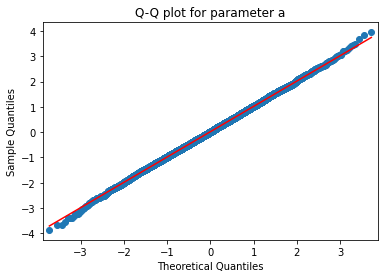

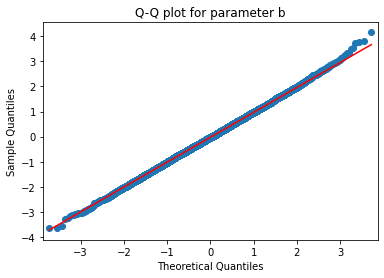

In [29]:
sms.qqplot(std_par_a, line = 'q')
plt.title("Q-Q plot for parameter a")


sms.qqplot(std_par_b, line = 'q')
plt.title("Q-Q plot for parameter b")
plt.show()

## Q4
From the Q-Q plot below shows that the norm 2 residuals of the solution in 1 follow the theoretical $\chi^2$ distribution with degrees of freedom 3, since both the sample and theoretical quantiles have a linear relationship or follow a straight line (i.e. along the 45 degrees line). Even though a few points in the top-right corner deviate from the 45 degrees line. we can still conclude that $\chi^2_{0bs} \sim \chi^2(\nu = 3)$. 


In [30]:
#============= Chi-square observed 
chisqure_obs

array([1.38548896, 7.30873353, 2.36250704, ..., 9.79956933, 1.5587573 ,
       0.69432437])

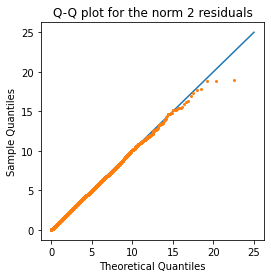

In [31]:
x_ = np.linspace(0,25, 10)
plt.figure(figsize=(4,4))
theoretical_quantiles = chi2.ppf(((np.arange(1, N+1) - 0.5)/N), 3)
plt.plot(x_,x_)
plt.plot(theoretical_quantiles, np.sort(chisqure_obs), 'o', markersize=2, linewidth =2)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("Q-Q plot for the norm 2 residuals")
plt.show()

## Q5

From the histograms, the standardized parameters look centered around zero (0).

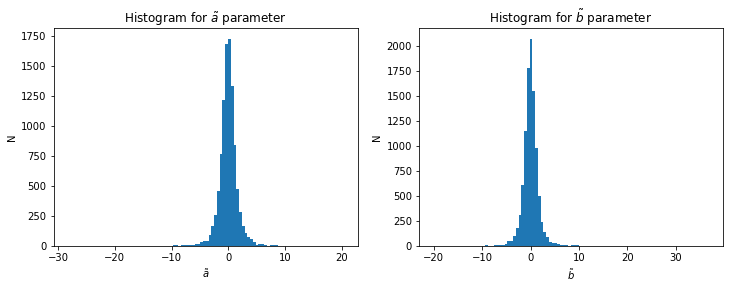

In [32]:
plt.figure(figsize=(12,4))

#=========== Histogram for a and b parameters
NBIN = 100
plt.subplot(1,2,1)
plt.hist(a_tilda, NBIN)
plt.ylabel("N")
plt.xlabel("$\\tilde{a}$")
plt.title("Histogram for $\\tilde{a}$ parameter")

plt.subplot(1,2,2)
plt.hist(b_tilda, NBIN)
plt.ylabel("N")
plt.xlabel("$\\tilde{b}$")
plt.title("Histogram for $\\tilde{b}$ parameter")
plt.show()

## Q6

Below we use a probability plot instead of Q-Q plot. Note that a probability plot is also used to serve the same purpose as a Q-Q plot, except that the y-axis of a probability plot is scaled differently from that of a Q-Q plot. However, the explanation of the two plots is the same.

In the plots below,, we conclude that the standardized parameter estimates follow the student t distribution with degrees of freedom 3. Even though, some of the points deviate from the 45 degrees line but we still have most of the points lying along or close to it. 

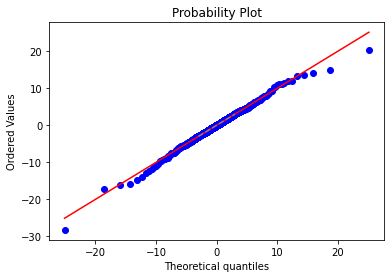

In [33]:
# Create a Q-Q plot comparing the sample with a t-distribution with 10 degrees of freedom
probplot(a_tilda, dist=t, sparams=(3,), plot=plt)

# Add a line at the identity line for reference
plt.plot([-3, 3], [-3, 3], color='gray', linestyle='--')

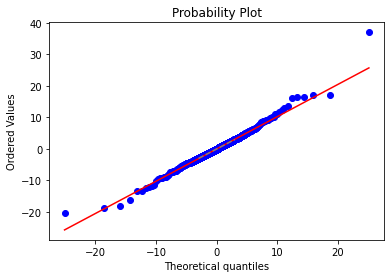

In [34]:
# Create a Q-Q plot comparing the sample with a t-distribution with 10 degrees of freedom
probplot(b_tilda, dist=t, sparams=(3,), plot=plt)

# Add a line at the identity line for reference
plt.plot([-3, 3], [-3, 3], color='gray', linestyle='--')

# THE END